In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def extract_duke14_disease_and_idx(name: str):
    if name.startswith('AMD'):
        return 'AMD', int(name[3:])
    elif name.startswith('DME'):
        return 'DME', int(name[3:])
    elif name.startswith('NORMAL'):
        return 'NORMAL', int(name[6:])


(1024, 496)
255


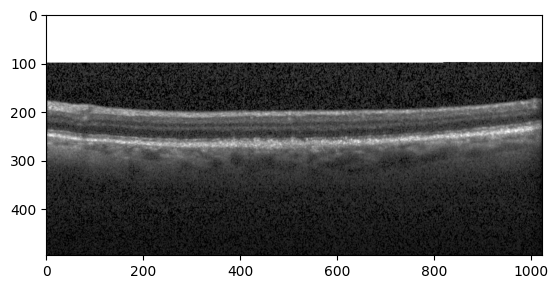

In [4]:
data_dir = 'Publication_Dataset'
pat_list = sorted(os.listdir(data_dir), key=lambda x: extract_duke14_disease_and_idx(x))
# each name is AMD1, AMD2, .., AMD10, Normal1, .., Normal10 etc, help extract the number

pat_list

example = data_dir + '/' + pat_list[6] + '/TIFFs/8bitTIFFs/072.tif'
img = Image.open(example)
print(img.size)
np_img = np.array(img)
print(np_img[0, 0])
plt.imshow(np_img, cmap='gray')

In [5]:
exist_num = set()
max_num = 0
for pat_name in pat_list:
    pat_dir = data_dir + '/' + pat_name
    tiff_dir = pat_dir + '/TIFFs/8bitTIFFs'
    tiff_list = sorted(os.listdir(tiff_dir))
    print(pat_name, len(tiff_list))
    exist_num.add(len(tiff_list))
    max_num = max(max_num, len(tiff_list))

print(exist_num, max_num)

AMD1 49
AMD2 49
AMD3 37
AMD4 37
AMD5 37
AMD6 37
AMD7 73
AMD8 37
AMD9 73
AMD10 73
AMD11 37
AMD12 37
AMD13 37
AMD14 73
AMD15 37
DME1 97
DME2 97
DME3 97
DME4 97
DME5 97
DME6 97
DME7 61
DME8 61
DME9 61
DME10 31
DME11 61
DME12 61
DME13 61
DME14 61
DME15 61
NORMAL1 97
NORMAL2 97
NORMAL3 97
NORMAL4 97
NORMAL5 97
NORMAL6 97
NORMAL7 97
NORMAL8 97
NORMAL9 97
NORMAL10 97
NORMAL11 49
NORMAL12 97
NORMAL13 97
NORMAL14 97
NORMAL15 97
{97, 37, 73, 49, 61, 31} 97


In [6]:
h_list = set()
w_list = set()
for pat_name in pat_list:
    pat_dir = data_dir + '/' + pat_name
    tiff_dir = pat_dir + '/TIFFs/8bitTIFFs'
    tiff_list = sorted(os.listdir(tiff_dir))
    for tiff_name in tiff_list:
        tiff_path = tiff_dir + '/' + tiff_name
        img = Image.open(tiff_path)
        np_img = np.array(img)
        # print(np_img.shape)
        h_list.add(np_img.shape[0])
        w_list.add(np_img.shape[1])
print(h_list, w_list)


{496} {512, 1024, 768}


In [7]:
save_dir = 'duke14_processed/'
os.makedirs(save_dir + 'AMD', exist_ok=True)
os.makedirs(save_dir + 'DME', exist_ok=True)
os.makedirs(save_dir + 'NORMAL', exist_ok=True)
for pat_name in pat_list:
    pat_dir = data_dir + '/' + pat_name
    disease, idx = extract_duke14_disease_and_idx(pat_name)
    print(disease, idx)
    pat_save_dir = save_dir + disease + '/'
    pat_fname_prefix = disease + '_' + str(idx)
    print(pat_save_dir, pat_fname_prefix)
    tiff_dir = pat_dir + '/TIFFs/8bitTIFFs'
    tiff_list = sorted(os.listdir(tiff_dir), key=lambda x: int(x[:-4]))
    print(len(tiff_list))
    for j, tiff_name in enumerate(tiff_list):
        tiff_path = tiff_dir + '/' + tiff_name
        img = Image.open(tiff_path)
        np_img = np.array(img).astype(np.float32)
        h, w = np_img.shape
        if j == 0:  
            print(np_img.shape)
            if w == 1024:
                print(tiff_dir + '/' + tiff_name)
        if w == 1024:
            np_img = (np_img[:, ::2] + np_img[:, 1::2]) // 2
            np_img = np_img.astype(np.uint8)
        
        # resize to 512x512
        img = Image.fromarray(np_img)
        img = img.resize((512, 512))

        # save to png
        tiff_png_name = tiff_name[:-4] + '.png'
        save_path = pat_save_dir + pat_fname_prefix + '_' + tiff_png_name
        if j == 0:
            print(np.array(img).shape)
            print('save_path:', save_path)
        img = img.convert('L')
        img.save(save_path)



AMD 1
duke14_processed/AMD/ AMD_1
49
(496, 512)
(512, 512)
save_path: duke14_processed/AMD/AMD_1_01.png
AMD 2
duke14_processed/AMD/ AMD_2
49
(496, 512)
(512, 512)
save_path: duke14_processed/AMD/AMD_2_01.png
AMD 3
duke14_processed/AMD/ AMD_3
37
(496, 1024)
Publication_Dataset/AMD3/TIFFs/8bitTIFFs/01.tif
(512, 512)
save_path: duke14_processed/AMD/AMD_3_01.png
AMD 4
duke14_processed/AMD/ AMD_4
37
(496, 512)
(512, 512)
save_path: duke14_processed/AMD/AMD_4_01.png
AMD 5
duke14_processed/AMD/ AMD_5
37
(496, 512)
(512, 512)
save_path: duke14_processed/AMD/AMD_5_01.png
AMD 6
duke14_processed/AMD/ AMD_6
37
(496, 512)
(512, 512)
save_path: duke14_processed/AMD/AMD_6_01.png
AMD 7
duke14_processed/AMD/ AMD_7
73
(496, 1024)
Publication_Dataset/AMD7/TIFFs/8bitTIFFs/01.tif
(512, 512)
save_path: duke14_processed/AMD/AMD_7_01.png
AMD 8
duke14_processed/AMD/ AMD_8
37
(496, 512)
(512, 512)
save_path: duke14_processed/AMD/AMD_8_01.png
AMD 9
duke14_processed/AMD/ AMD_9
73
(496, 1024)
Publication_Dataset/A